# Паттерны поведения в аномальных данных

In [1]:

import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
anomaly_df = pd.read_csv('anomaly.csv')
normal_df = pd.read_csv('normal.csv')

In [3]:
anomaly_df.describe()

,Unnamed: 0,transaction_id,ip,device_id,tran_code,mcc,client_id,pin_inc_count,card_status,sum,balance
count,144.000000,1.440000e+02,1.440000e+02,144.000000,144.000000,144.000000,1.440000e+02,144.000000,144.000000,144.000000,144.000000
mean,36043.506944,7.172971e+06,2.312001e+09,986.805556,58.333333,5779.833333,5.254353e+08,1.875000,0.381944,670.981181,355740.890767
std,18011.010973,2.940865e+06,1.001002e+09,428.202117,170.004525,2579.394302,2.690493e+08,1.413595,0.487559,319.872487,325224.562085
min,364.000000,1.090076e+06,9.627244e+07,32.000000,-1.000000,1002.000000,1.018149e+08,0.000000,0.000000,107.080000,0.000000
25%,21687.500000,4.512064e+06,1.480147e+09,747.750000,-1.000000,3595.250000,2.858986e+08,0.000000,0.000000,414.657500,0.000000
50%,44134.500000,8.106854e+06,2.989228e+09,1243.000000,-1.000000,6093.500000,5.057206e+08,3.000000,0.000000,671.615000,272192.038000
75%,52414.500000,9.923945e+06,3.154127e+09,1293.000000,12.500000,7819.250000,7.770385e+08,3.000000,1.000000,958.902500,626489.931638
max,53067.000000,9.999813e+06,3.647996e+09,1495.000000,991.000000,9996.000000,9.710385e+08,3.000000,1.000000,1196.120000,965845.370000


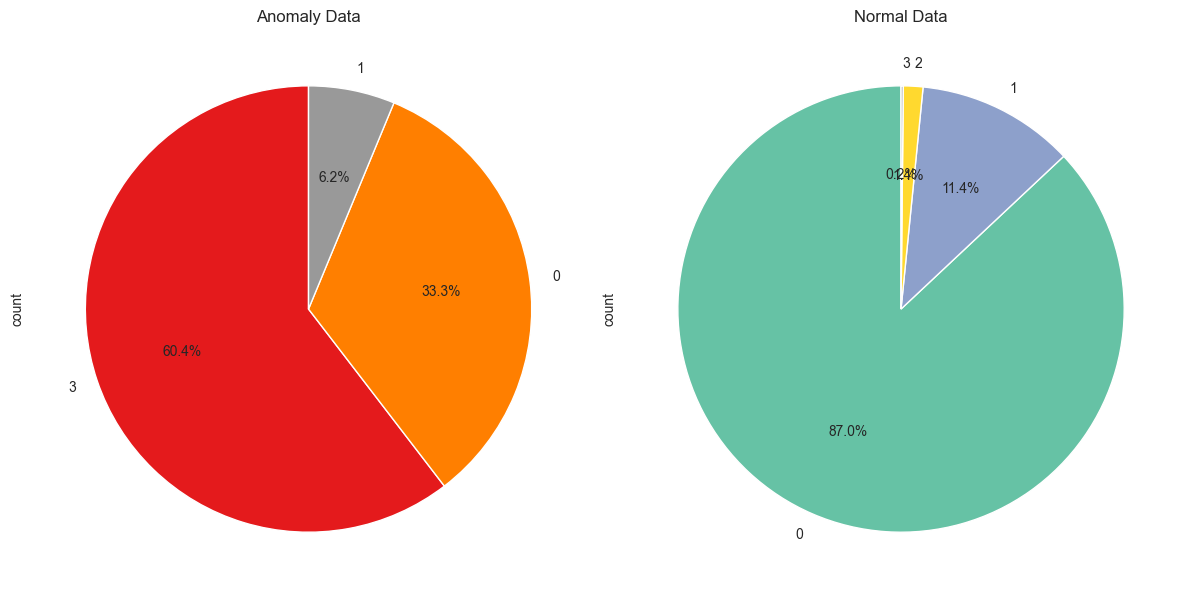

In [4]:
category_counts_anomaly = anomaly_df['pin_inc_count'].value_counts()
category_counts_normal = normal_df['pin_inc_count'].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
category_counts_anomaly.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set1', legend=False)
plt.title('Anomaly Data')
plt.subplot(1, 2, 2)
category_counts_normal.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title('Normal Data')
plt.tight_layout()
plt.show()

Видна большая разница между всеми данными и аномальными. Вот это явный паттерн повидения, слишком много попыток ввода пинкода

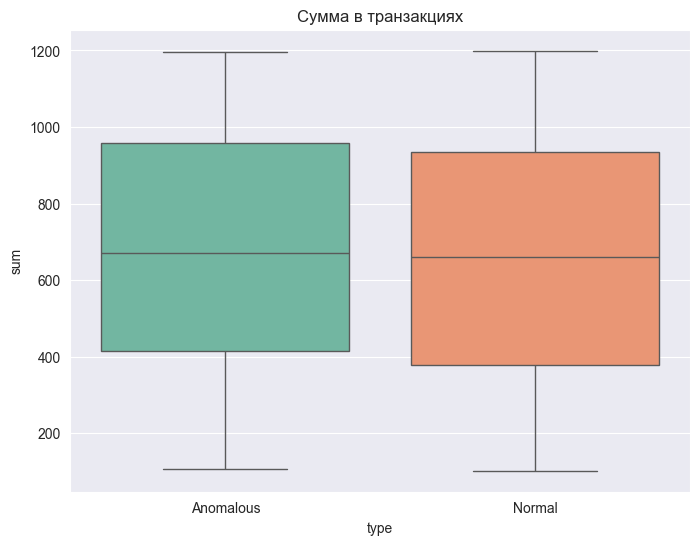

In [5]:

anomaly_df['type'] = 'Anomalous'
normal_df['type'] = 'Normal'

combined_df = pd.concat([anomaly_df[['sum', 'type']], normal_df[['sum', 'type']]])

plt.figure(figsize=(8, 6))
plt.title('Сумма в транзакциях')
sns.boxplot(data=combined_df, x='type', y='sum', orient='v', hue='type', palette="Set2", showfliers=False)

plt.show()

Практически индентично по сумме, что в аномальных данных, что в нормальных, она слегка большее 600

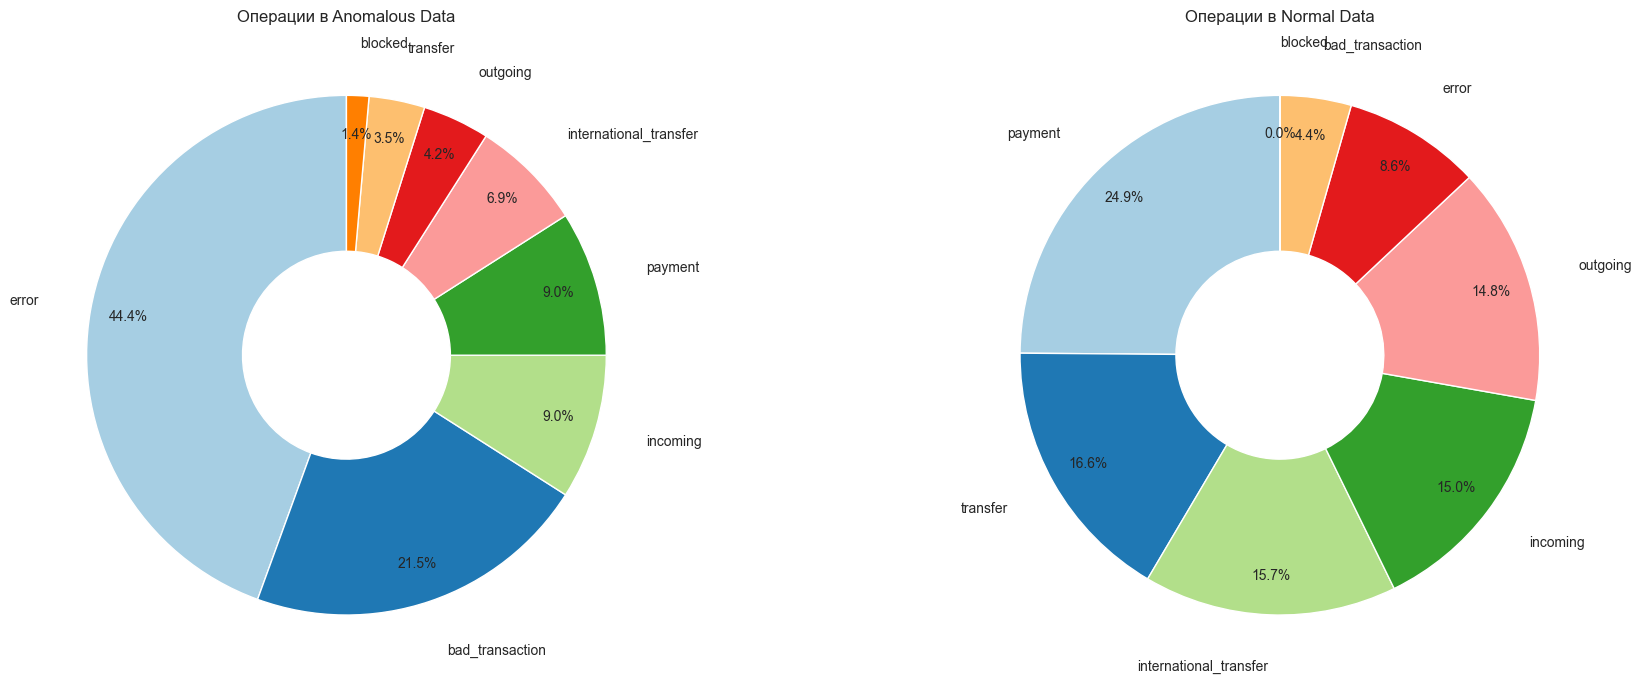

In [6]:
anomaly_counts = anomaly_df['oper_type'].value_counts()

normal_counts = normal_df['oper_type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

axes[0].pie(anomaly_counts,
            labels=anomaly_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Paired.colors,
            labeldistance=1.2,
            pctdistance=0.85,  
            wedgeprops={'width': 0.6})

axes[1].pie(normal_counts,
            labels=normal_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Paired.colors,
            labeldistance=1.2, 
            pctdistance=0.85, 
            wedgeprops={'width': 0.6})
axes[1].set_title('Операции в Normal Data')
axes[0].set_title('Операции в Anomalous Data')

plt.tight_layout()
plt.show()

Опять явный признак аномальности данных. Или "error" или "bad_transaction", в полном наборе данных всё сбалансированно

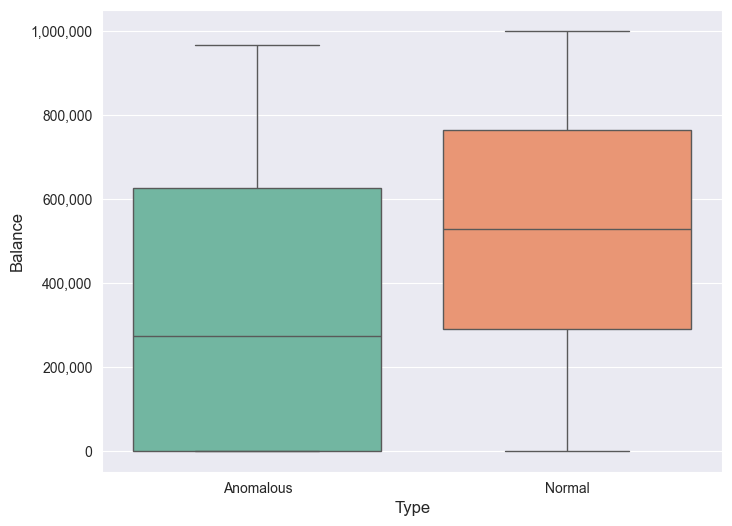

In [7]:
anomaly_df['type'] = 'Anomalous'
normal_df['type'] = 'Normal'
combined_df = pd.concat([anomaly_df[['balance', 'type']], normal_df[['balance', 'type']]])

plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x='type', y='balance', orient='v', hue='type', palette="Set2", showfliers=False)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Type', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Вот тут медиана баланса в аномальных данных выбивается, нельзя это считать уверенным паттерном, но с этим тожн можно работать  

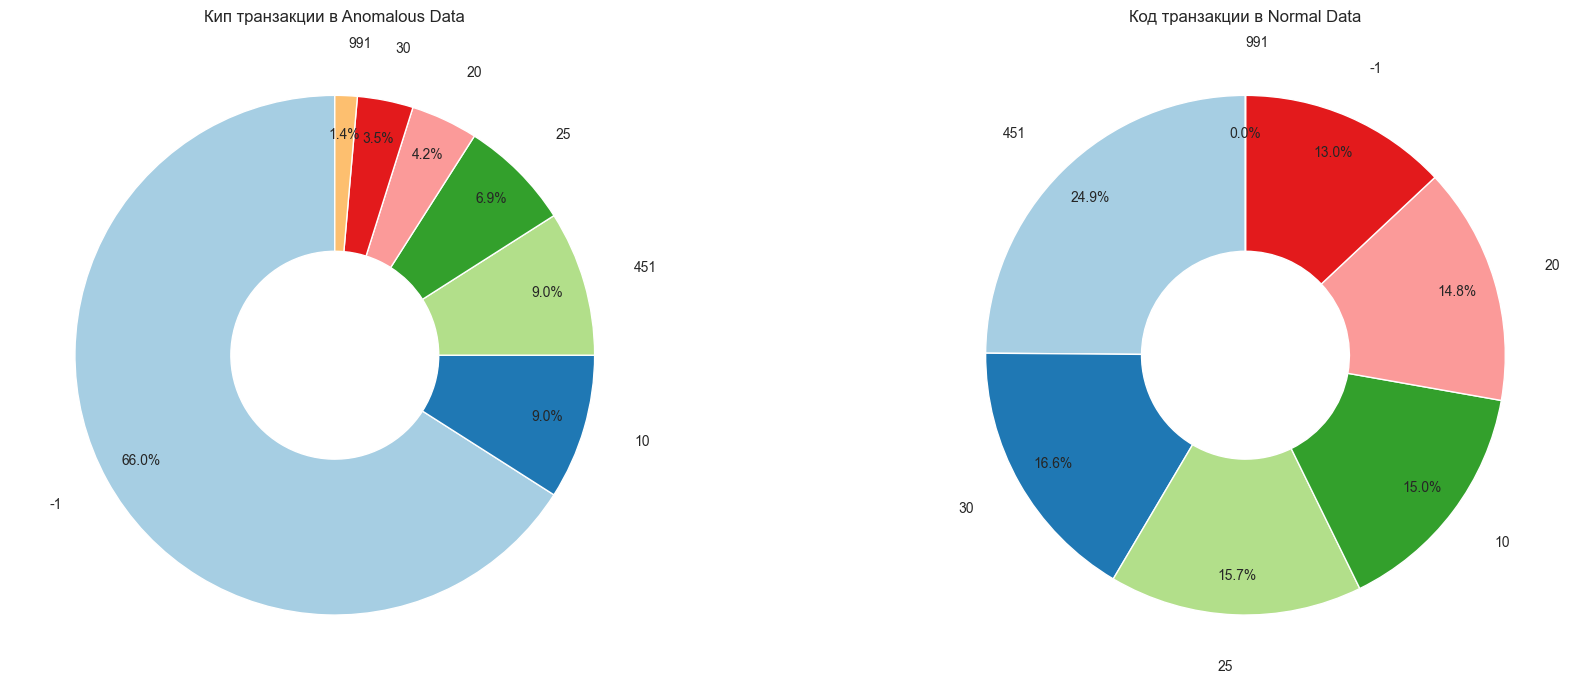

In [8]:
anomaly_counts = anomaly_df['tran_code'].value_counts()

normal_counts = normal_df['tran_code'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

axes[0].pie(anomaly_counts,
            labels=anomaly_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Paired.colors,
            labeldistance=1.2,
            pctdistance=0.85,
            wedgeprops={'width': 0.6})

axes[1].pie(normal_counts,
            labels=normal_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Paired.colors,
            labeldistance=1.2,
            pctdistance=0.85,
            wedgeprops={'width': 0.6})
axes[1].set_title('Код транзакции в Normal Data')
axes[0].set_title('Кип транзакции в Anomalous Data')

plt.tight_layout()
plt.show()

Аналогичная ситуация по распределеннию как и в "oper_type". В данных с аномалиями лидирует с ответом 

### Постройка карты, для установления местоположения аномальных транзакций

In [9]:
import socket
import struct
import requests


def int_to_ip(ip_int):
    return socket.inet_ntoa(struct.pack('!I', ip_int))


In [10]:
api_key = "Привет_всем_читателям_гита"

In [11]:
def get_location(ip_int):
    ip_address = int_to_ip(ip_int)
    url = f'https://api.ipgeolocation.io/ipgeo?apiKey={api_key}&ip={ip_address}'

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        latitude = data.get('latitude')
        longitude = data.get('longitude')
        city = data.get('city', 'Unknown')
        return latitude, longitude, city
    else:
        return None, None, None


In [ ]:
anomaly_df[['latitude', 'longitude', 'city']] = anomaly_df['ip'].apply(lambda x: pd.Series(get_location(x)))

In [ ]:
import folium

data = anomaly_df
m = folium.Map(location=[20, 0], zoom_start=2)

for lat, lon, city in zip(data['latitude'], data['longitude'], data['city']):
    folium.Marker([lat, lon], popup=city).add_to(m)
m.save('map.html')
